# INP: Interpolation #
## Verlauf der si-Funktion ##

s.o.


In [3]:
import numpy as np
from numpy import (pi, log10, sqrt, exp, sin, cos, tan, angle, arange,
                    linspace, array, zeros, ones)

import scipy.signal as sig
from scipy.special import diric

import matplotlib as mpl
import matplotlib.pyplot as plt

PRINT = False           
BASE_DIR = "."
FILENAME = "SMP-si_interpolate" 
FMT = ".svg"

#mpl.rcParams['xtick.labelsize'] = 'small'
mpl.rc('xtick', labelsize=16, direction='in')#, major.size = 4)
mpl.rc('xtick.major', size = 4)
mpl.rc('ytick', labelsize=16, direction='in')
mpl.rc('ytick.major', size = 4)
mpl.rc('lines', markersize = 6)

#mpl.rcParams['ytick.labelsize'] = 'small'
mpl.rcParams['axes.labelsize'] = 20

def scale_axis(val, scale = 0.1):
    delta = abs(max(val) - min(val))
    return [min(val) - delta * scale, max(val) + delta * scale]

figsize = (7,3.5)

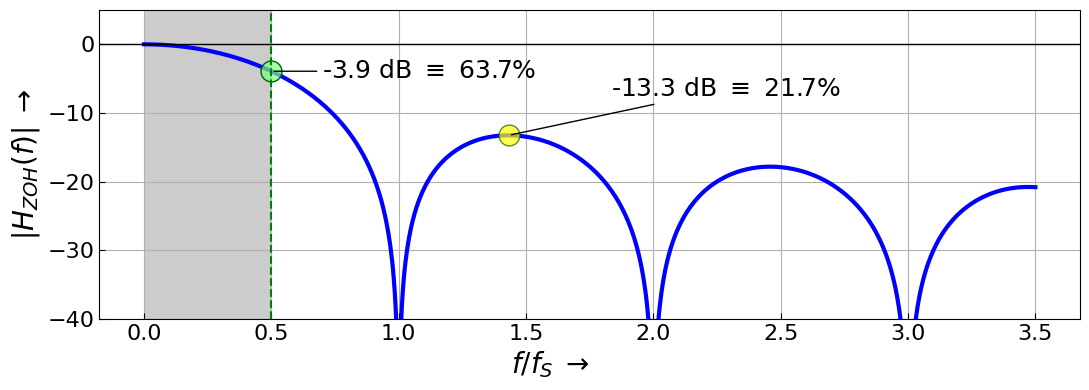

In [4]:
EXPORT =  False
BASE_DIR = "/home/muenker/Daten/HM/dsvFPGA/Vorlesung/2016ss/nologo/img/"
#BASE_DIR = "D:/Daten/HM/dsvFPGA/Vorlesung/2016ss/nologo/img/"
FILENAME = "INP_si" # "DFT" #
FMT = ".svg"
FIGSIZE = (11,4)
DIRAC = False
VIEW = False
GRID = True
dB = True

N = 1000

def y(f, dB = False):
#    y = np.abs(diric(t*pi/4,8))
    y = np.abs(np.sinc(f))
    if dB:
        return 20*log10(y)
    else:
        return y
# generate time array
f = linspace(0, 3.5, num=N) # "analog" time in N steps

fig1 = plt.figure(num=1, figsize=FIGSIZE, facecolor = 'white')
ax1 = fig1.add_subplot(111)

ax1.grid(GRID)

ax1.plot(f, y(f, dB = dB) ,color = 'b', lw = 3)   

f_max = 1.5 - 1./(1.5 * pi**2) # approximation for max. of first sidelobe
y_max = y(f_max, dB = dB)
y_05 = y(0.5, dB = dB)


ax1.plot(0.5, y(0.5, dB = dB), 'o', markerfacecolor=(0.5,1,0.5,0.7), markersize = 15,
      markeredgecolor = 'darkgreen')# mark the edge of the baseband
ax1.plot(f_max, y_max, 'o', markerfacecolor='yellow', alpha = 0.7,  markersize = 15,
      markeredgecolor = 'darkgreen')# mark max. sidelobe

    
ax1.annotate(r'%.1f dB $ \equiv $ %.1f' %(y(0.5, dB = True), y(0.5, dB = False)*100) + '%',
        (0.5, y_05),(0.7, y_05), xycoords='data', ha="left", va="center", size=18,
        arrowprops=dict(arrowstyle="-", facecolor = 'red', edgecolor='black' ))
ax1.annotate(r'%.1f dB $ \equiv $ %.1f' %(y(f_max, dB = True), y(f_max, dB = False)*100) + '%',
        (f_max, y_max),(f_max + 0.4, y_max+5), xycoords='data', ha="left", va="bottom", size=18,
        arrowprops=dict(arrowstyle="-", facecolor = 'red', edgecolor='black' ))
ax1.axvspan(0, 0.5, facecolor='0.8', edgecolor = 'none')# baseband in grey
ax1.axvline(1/2, color='g', linestyle='--', lw = 1.5) # and baseband border
ax1.axhline(0, color = 'k', lw = 1)


if dB:
    ax1.set_ylim(-40, 5)    
else:
    ax1.set_ylim(-0.3, 1.2)   

ax1.set_xlabel(r'$f/f_S \; \rightarrow$', size = 20, ha ="right")
ax1.set_ylabel(r'$|H_{ZOH}(f)| \; \rightarrow$', size = 20)

fig1.set_tight_layout(True)

if EXPORT:
    fig1.savefig(BASE_DIR + FILENAME + FMT, dpi =300)

***
**Copyright**

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digital Signal Processing"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2019*.